In [1]:
import pandas as pd
import utils.fetcher_utils as fetcher
import utils.preprocess_util as preproc

import numpy as np
import matplotlib.pyplot as plt
import locale


In [2]:
# set pandas options
pd.set_option('display.max_columns', None)


In [3]:
# fetch the data 
df = fetcher.aquireIMDbDataFrame()
df.head()

Reading data from ../resources/movie_metadata.csv


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
print(f"Maximum Gross: {locale.currency(df['gross'].max(), grouping=True)}")
print(f"Minimum Gross: {locale.currency(df['gross'].min(), grouping=True)}")

# This looks weird, let's investigate

Maximum Gross: $760,505,847.00
Minimum Gross: $162.00


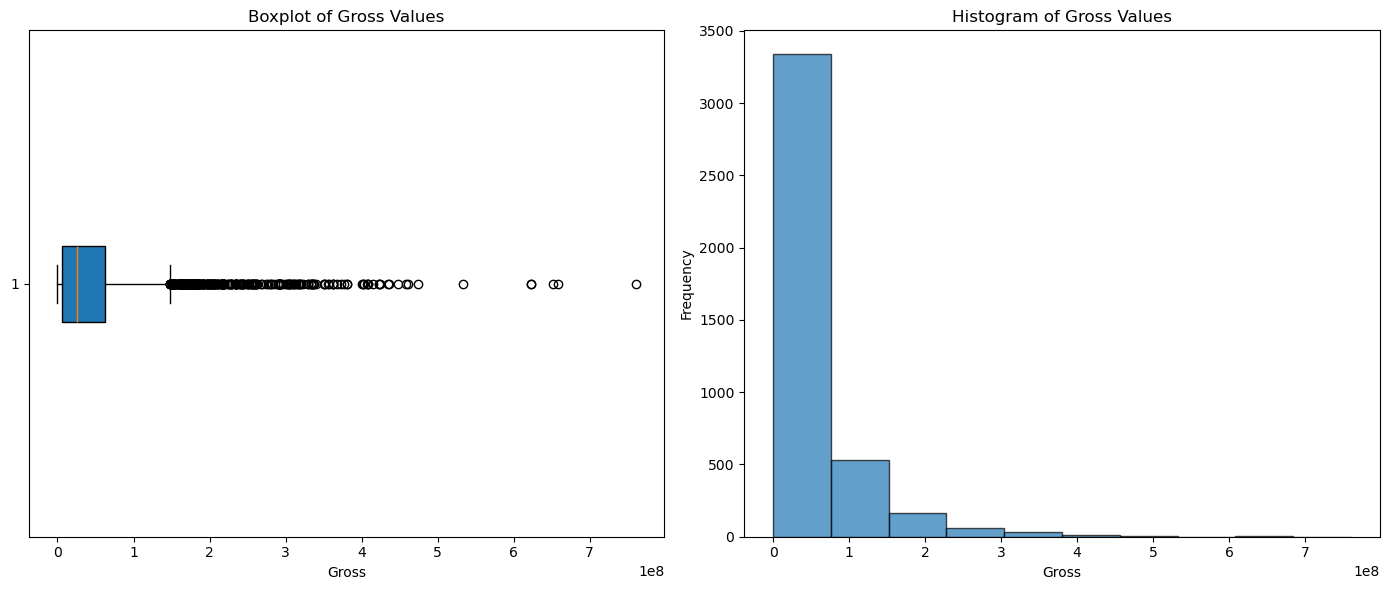

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot
axes[0].boxplot(df['gross'].dropna(), vert=False, patch_artist=True)
axes[0].set_title("Boxplot of Gross Values")
axes[0].set_xlabel("Gross")

# Histogram
axes[1].hist(df['gross'].dropna(), bins=10, edgecolor='k', alpha=0.7)
axes[1].set_title("Histogram of Gross Values")
axes[1].set_xlabel("Gross")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [6]:
gross_cleaned = df['gross'].dropna()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = gross_cleaned.quantile(0.25)
Q3 = gross_cleaned.quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Calculate outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = gross_cleaned[(gross_cleaned < lower_bound) | (gross_cleaned > upper_bound)]

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print("Outliers:")
print(outliers)

Q1: 5340987.5, Q3: 62309437.5, IQR: 56968450.0
Lower Bound: -80111687.5, Upper Bound: 147762112.5
Outliers:
0       760505847.0
1       309404152.0
2       200074175.0
3       448130642.0
6       336530303.0
           ...     
4141    201148159.0
4449    184925485.0
4694    218051260.0
4752    177343675.0
4778    234903076.0
Name: gross, Length: 306, dtype: float64
